In [78]:
# add packages
#Standard
import numpy as np
import pandas as pd
from time import time
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
 
#Outlier Detection
from sklearn.ensemble import IsolationForest

#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
#Model Selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')


In [79]:
# read data
data = pd.read_csv('measurements.csv')

In [80]:
#display data
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [81]:
#NaN-value
(data.isna().sum()/len(data)).sort_values()

distance         0.000000
consume          0.000000
speed            0.000000
temp_outside     0.000000
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
temp_inside      0.030928
specials         0.760309
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [82]:
#read data from excel
df = pd.read_excel(r'measurements2.xlsx')
 

In [83]:
df.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [84]:
# two dataset are simillar
(df.isna().sum()/len(df)).sort_values()

distance         0.000000
consume          0.000000
speed            0.000000
temp_outside     0.000000
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
temp_inside      0.030928
specials         0.760309
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [85]:
# To explore the column types 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [86]:
# changing column types to proper type
df['distance'] = df['distance'].replace(',','.').astype('float32')
df['consume'] = df['consume'].replace(',','.').astype('float32')
df['temp_inside'] = df['temp_inside'].replace(',','.').astype('float32')
df['refill liters'] = df['refill liters'].replace(',','.').astype('float32')


In [87]:
#Double Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB


# control catecorical values 

In [88]:
#Decreased unique values to most important classes for scaling

df['specials']. value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [89]:
#changing capital letter to lowercase in order to be consistent
df['specials']=df['specials'].str.lower()

In [90]:
df['specials']. value_counts()

rain                  32
sun                   27
ac                    14
ac rain               10
snow                   3
sun ac                 3
ac sun                 2
ac snow                1
half rain half sun     1
Name: specials, dtype: int64

In [92]:
df.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,others,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,others,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,others,SP98,1,0,0,NaN,NaN


In [58]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


In [59]:
df.shape

(388, 12)

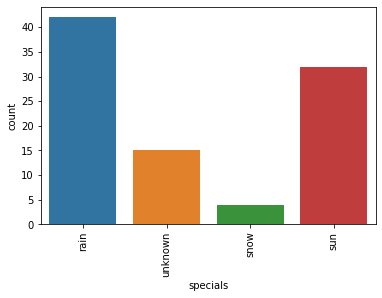

In [76]:
sns.countplot(data = df, x = "specials")
plt.xticks(rotation=90)
plt.show()

In [21]:
df['specials'] = df['specials'].fillna('others')
df['refill liters'] = df['refill liters'].fillna(0)
df['refill gas'] = df['refill gas'].fillna('norefill')


In [22]:
(df.isna().sum()/len(data)).sort_values()

distance         0.000000
consume          0.000000
speed            0.000000
temp_outside     0.000000
specials         0.000000
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.000000
refill gas       0.000000
temp_inside      0.030928
dtype: float64

In [23]:
df['temp_inside'].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [24]:
df['temp_inside'].describe(include="all") 

count    376.000000
mean      21.929522
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

<AxesSubplot:xlabel='temp_inside', ylabel='Density'>

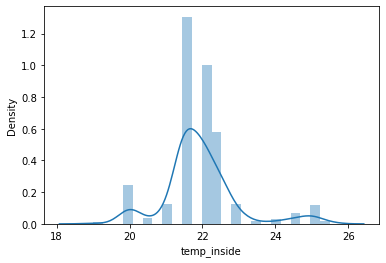

In [25]:
import seaborn as sns
sns.distplot(df['temp_inside'])

In [26]:
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())

In [27]:
(df.isna().sum()/len(data)).sort_values()

distance         0.0
consume          0.0
speed            0.0
temp_inside      0.0
temp_outside     0.0
specials         0.0
gas_type         0.0
AC               0.0
rain             0.0
sun              0.0
refill liters    0.0
refill gas       0.0
dtype: float64

In [28]:
df.shape

(388, 12)

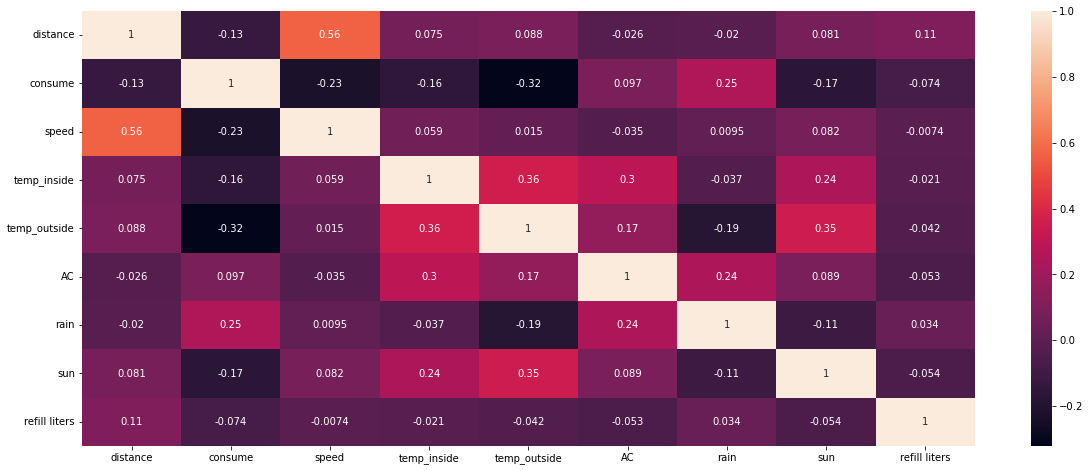

In [29]:
corr_matrix=df.corr(method='pearson')   
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [30]:
y = df['consume']
X = df.drop(['consume'], axis=1)

In [31]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#categorical features and numerical ones are going to be treated differently
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [33]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,310.0,19.564516,21.168934,1.3,11.8,15.4,19.45,216.100006
speed,310.0,42.070968,13.507093,14.0,33.0,41.0,50.00,90.000000
temp_inside,310.0,21.952568,0.974350,19.0,21.5,22.0,22.50,25.500000
temp_outside,310.0,11.458065,7.084546,-5.0,7.0,10.0,16.00,31.000000
AC,310.0,0.067742,0.251709,0.0,0.0,0.0,0.00,1.000000
rain,310.0,0.125806,0.332167,0.0,0.0,0.0,0.00,1.000000
sun,310.0,0.090323,0.287107,0.0,0.0,0.0,0.00,1.000000
refill liters,310.0,1.047097,6.278092,0.0,0.0,0.0,0.00,45.000000


In [34]:
 
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_normalized = MinMaxtransformer.transform(X_train_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_train_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,0.025605,0.157895,0.384615,0.305556,0.0,0.0,0.0,0.0
1,0.048883,0.342105,0.538462,0.194444,0.0,0.0,0.0,0.0
2,0.068901,0.250000,0.384615,0.305556,0.0,0.0,0.0,0.0
3,0.115922,0.750000,0.307692,0.361111,1.0,1.0,0.0,0.0
4,0.068436,0.421053,0.461538,0.611111,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>


In [35]:
 

X_test_normalized = MinMaxtransformer.transform(X_test_num)
print(type(X_normalized))
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test_num.columns)
display(X_test_normalized.head())
print(type(X_test_normalized))

<class 'pandas.core.frame.DataFrame'>


,distance,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
0,0.013501,0.236842,0.461538,0.638889,0.0,0.0,0.0,0.000000
1,0.060056,0.236842,0.384615,0.333333,0.0,0.0,0.0,0.000000
2,0.051210,0.342105,0.384615,0.305556,0.0,0.0,0.0,0.000000
3,0.048417,0.302632,0.384615,0.305556,0.0,0.0,0.0,0.000000
4,0.079143,0.421053,0.461538,0.583333,0.0,0.0,0.0,0.826667


<class 'pandas.core.frame.DataFrame'>


In [36]:
 
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoded, columns=cols)
X_train_cat_encoded.head()

,specials_rain,specials_snow,specials_sun,specials_unknown,gas_type_SP98,refill gas_SP98,refill gas_norefill
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [37]:
from sklearn.preprocessing import OneHotEncoder
encoded_test = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(encoded_test, columns=cols)
X_test_cat_encoded.head()

,specials_rain,specials_snow,specials_sun,specials_unknown,gas_type_SP98,refill gas_SP98,refill gas_norefill
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [38]:
X_test_cat['specials'].value_counts()

others     62
rain        8
sun         4
unknown     3
snow        1
Name: specials, dtype: int64

In [39]:
X_train= pd.concat([X_normalized,X_train_cat_encoded], axis=1)
X_test= pd.concat([X_test_normalized,X_test_cat_encoded], axis=1)

In [40]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
 
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.34275671023940957

In [42]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
    return

In [43]:
models = [LinearRegression(),SGDRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor(),
          SGDRegressor(),AdaBoostRegressor()]

models_automation(models, X_train, y_train, X_test, y_test)

LinearRegression: Train -> 0.34275671023940957, Test -> 0.1232699367545056
SGDRegressor: Train -> 0.10168014262981484, Test -> 0.0304290855111069
DecisionTreeRegressor: Train -> 0.9995763863509102, Test -> 0.017025130472125283
KNeighborsRegressor: Train -> 0.4819957215085603, Test -> 0.20618195370272174
RandomForestRegressor: Train -> 0.9412986166425742, Test -> 0.5541403739907222
SGDRegressor: Train -> 0.09921610396277303, Test -> 0.02598686478587675
AdaBoostRegressor: Train -> 0.7495269584355322, Test -> 0.3264930051476399
